In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC, LinearSVC

import pydot
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report



%matplotlib inline
plt.style.use('seaborn-white')

Download the example dataset from here and load it to your dataframe

In [68]:
df = pd.read_csv("data\svc.csv")
df['color'] = df['y'].map({'A': 'r', 'B':'b'})
df['y_binary'] = df['y'].map({'A': '0', 'B':'1'})
df.head(20)

,y,x1,x2,color,y_binary
0,A,3,7,r,0
1,A,12,6,r,0
2,A,18,6,r,0
3,A,17,17,r,0
4,A,12,6,r,0
5,A,3,7,r,0
6,A,7,5,r,0
7,A,10,10,r,0
8,A,17,8,r,0
9,A,17,11,r,0


Create a plot for our datapoints (similar to the example shown)

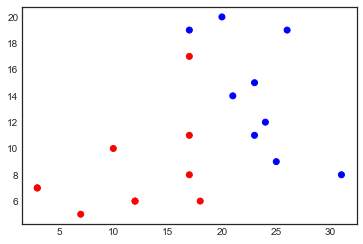

In [49]:
plt.scatter(df['x1'], df['x2'], color=df['color'])
#ax = plt.subplots()
#scatter = ax.scatter(df['x1'], df['x2'], color=df['color'])

#legend1 = ax.legend(*scatter.legend_elements(), loc='right', title='y')
#ax.add_artist(legend1)


Train an SVC model using all datapoints and a linear kernel, make sure to preprocess the data (i.e., y)

In [91]:
svm = SVC(kernel='linear')
#X = np.array(df['x1'])
#y = np.array(df['x2'])
svm.fit(df[['x1', 'x2']].as_matrix(), df['y_binary'])


C:\Users\jkom8\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [92]:
# Uncomment the following code block when you have your model ready

w = svm.coef_[0]
a = -w[0] / w[1]
x_ticks = np.linspace(0, 35)
y_ticks = a * x_ticks - (svm.intercept_[0]) / w[1]


Draw the resulting hyperplane from our model (should be similar to the following graph)

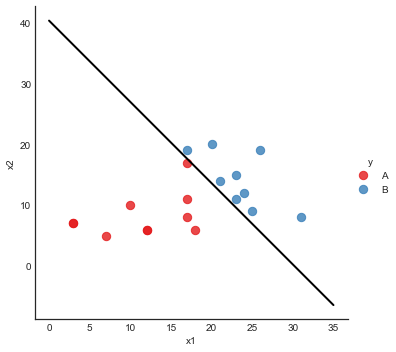

In [93]:
sns.lmplot('x1', 'x2', data=df, hue='y', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(x_ticks, y_ticks, linewidth=2, color='black');

Experiment with 3 different C parameter values and redraw your separating hyperplane and observe the differences